In [1]:
from Model import SegNetModel
from HyperparameterOptimization import findOptimalBatchSize

Using TensorFlow backend.


In [2]:
model = SegNetModel('noname')
bs = 4 # findOptimalBatchSize(model, 128, save_excel=False)
print("Optimum", bs)

Done building decoder..
Optimum 4


In [4]:
model = SegNetModel('noname')
hst = model.train(bs, n_epoch=1000, reduced_size=4096)

Done building decoder..
Epoch 1/1000
180/180 [==============================] - 193s 1s/step - loss: 0.3621 - acc: 0.9697 - val_loss: 0.3502 - val_acc: 0.9700
Epoch 2/1000
180/180 [==============================] - 190s 1s/step - loss: 0.3520 - acc: 0.9697 - val_loss: 0.3449 - val_acc: 0.9700
Epoch 3/1000
180/180 [==============================] - 190s 1s/step - loss: 0.3489 - acc: 0.9697 - val_loss: 0.3427 - val_acc: 0.9700
Epoch 4/1000
180/180 [==============================] - 190s 1s/step - loss: 0.3470 - acc: 0.9697 - val_loss: 0.3411 - val_acc: 0.9700
Epoch 5/1000
180/180 [==============================] - 190s 1s/step - loss: 0.3456 - acc: 0.9697 - val_loss: 0.3397 - val_acc: 0.9700
Epoch 6/1000
180/180 [==============================] - 190s 1s/step - loss: 0.3448 - acc: 0.9697 - val_loss: 0.3392 - val_acc: 0.9700
Epoch 7/1000
180/180 [==============================] - 190s 1s/step - loss: 0.3440 - acc: 0.9697 - val_loss: 0.3394 - val_acc: 0.9700
Epoch 8/1000
180/180 [=========

'56'

In [35]:
from getABSDData import getABSDDataMask
training, dev, test = getABSDDataMask(batch_size=4, remove_nan=True) # , reduced_size=4096

In [36]:
(len(training) + len(dev) + len(test)) * 4

42560

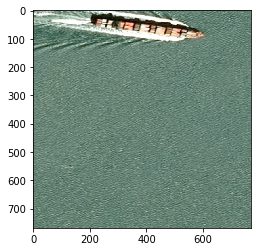

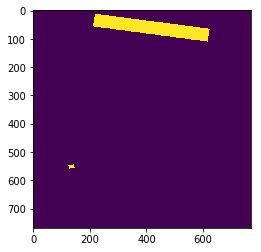

In [27]:
i, m = dev[5]
import matplotlib .pyplot as plt
import numpy as np
plt.imshow(i[3, :, :, :].astype(np.uint8))
plt.show()
plt.imshow(m[3, :].reshape((768, 768)))
plt.show()

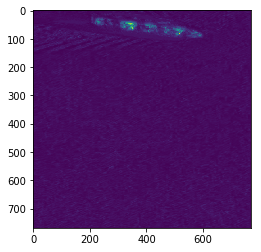

In [28]:
p = model.model.predict(i[3:4, :, :, :])
plt.imshow(p.reshape((768, 768)))
plt.show()

In [26]:
p.max()

5.0483508e-05